<a href="https://colab.research.google.com/github/ironhopper/mlstudy/blob/master/13184322_ml_hw6_add_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

w_:  [0.61538458 0.30769229]
b_:  -2.292307495626252


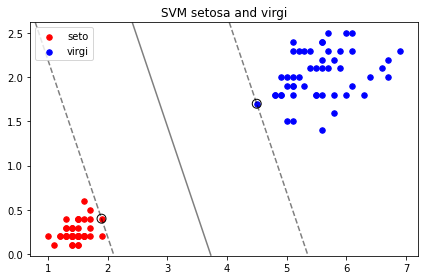

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import load_iris
# from array_check_function import df,dfx,dfn,dfnx # custom functions

ir = load_iris()
ir_x = ir.data
ir_y = ir.target

seto =ir_y[0:50]
vers = ir_y[50:100]
virg = ir_y[100:150]

sevi = np.concatenate((seto,virg))
vevi = np.concatenate((vers,virg))

petal_x = ir_x[:,[2,3]]

seto_pex = petal_x[0:50]
vers_pex = petal_x[50:100]
virg_pex = petal_x[100:150]

sevi_pex = np.concatenate((seto_pex,virg_pex))
vevi_pex = np.concatenate((vers_pex,virg_pex))

svm1 = SVC(kernel='linear').fit(sevi_pex,sevi)


# print("w: ",svm1.coef_)
# print("b: ",svm1.intercept_)
print("w_: ",svm1.coef_[0])
print("b_: ",svm1.intercept_[0])

plt.scatter(sevi_pex[0:50, 0:1], sevi_pex[0:50, 1:2], c='r', s=30, cmap=plt.cm.Paired,label='seto')

plt.scatter(sevi_pex[50:100, 0], sevi_pex[50:100, 1], c='b', s=30, cmap=plt.cm.Paired,label='virgi')
xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                        np.linspace(ylim[0], ylim[1], 50))
Z = svm1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(svm1.support_vectors_[:, 0], svm1.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.title("SVM setosa and virgi" )
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


wrong1(virginica but missclassfied): 
 [[4.5 1.7]
 [5.  1.5]] and number of point is  2
wrong2(versicolor but missclassfied): 
 [[4.8 1.8]
 [5.  1.7]
 [5.1 1.6]] and number of point is 3
w0:  [2.1829247  2.25365588]
b0:  -14.414868277198165
nsv(number of support vectors)[Num(versicolor) , Num(virginica)]:  [12 12]


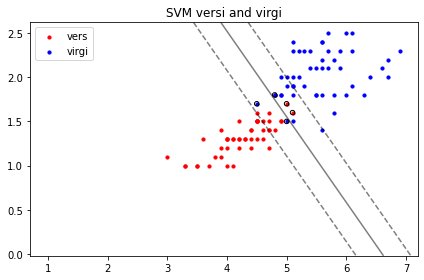

In [65]:
svm2 = SVC(kernel='linear').fit(vevi_pex,vevi)
decision_function2 = np.dot(vevi_pex, svm2.coef_[0]) + svm2.intercept_[0]
df2 = svm2.decision_function(vevi_pex)
# print(df2)
vvm = vevi_pex[(df2<0) & (vevi == 2)]
vvp = vevi_pex[(df2>0) & (vevi == 1)]

print("wrong1(virginica but missclassfied): \n",vvm,"and number of point is ",(len(vvm)))
print("wrong2(versicolor but missclassfied): \n",vvp,"and number of point is",(len(vvp)))

sv = svm2.support_vectors_
# print("w: ",svm2.coef_)
# print("b: ",svm2.intercept_)

print("w0: ",svm2.coef_[0])
print("b0: ",svm2.intercept_[0])
print("nsv(number of support vectors)[Num(versicolor) , Num(virginica)]: ", svm2.n_support_)

# print("sv: ", svm2.support_vectors_ )

plt.scatter(vevi_pex[0:50, 0:1], vevi_pex[0:50, 1:2], c='r', s=10, cmap=plt.cm.Paired,label='vers')
plt.scatter(vevi_pex[50:100, 0], vevi_pex[50:100, 1], c='b', s=10, cmap=plt.cm.Paired,label='virgi')

# xlim = plt.xlim()
# ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                        np.linspace(ylim[0], ylim[1], 50))
Z = svm2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(vvm[:, 0], vvm[:, 1], s=20,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(vvp[:, 0], vvp[:, 1], s=20,
            facecolors='none', zorder=10, edgecolors='k')
plt.title("SVM versi and virgi" )
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

wrong3p(virginica but missclassfied): 
 [[4.5 1.7]
 [5.  1.5]
 [5.1 1.5]] and number of point is  3
wrong3m(versicolor but missclassfied): 
 [[4.8 1.8]
 [5.  1.7]] and number of point is 2
nsv3(number of support vectors)[Num(versicolor) , Num(virginica)]:  [6 7]


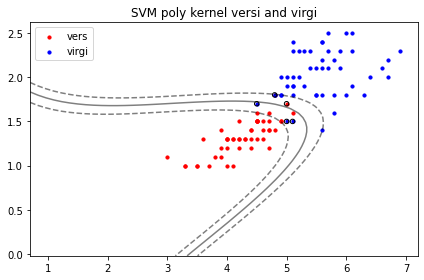

In [66]:
svm3 = SVC(kernel='poly',degree=3,gamma=1).fit(vevi_pex,vevi)

df3 = svm3.decision_function(vevi_pex)

wpp3 = vevi_pex[(df3<0) & (vevi == 2)]
wpm3 = vevi_pex[(df3>0) & (vevi == 1)]
sv3 = svm3.support_vectors_

print("wrong3p(virginica but missclassfied): \n",wpp3,"and number of point is ",(len(wpp3)))
print("wrong3m(versicolor but missclassfied): \n",wpm3,"and number of point is",(len(wpm3)))
print("nsv3(number of support vectors)[Num(versicolor) , Num(virginica)]: ", svm3.n_support_)

plt.scatter(vevi_pex[0:50, 0:1], vevi_pex[0:50, 1:2], c='r', s=10, cmap=plt.cm.Paired,label='vers')
plt.scatter(vevi_pex[50:100, 0], vevi_pex[50:100, 1], c='b', s=10, cmap=plt.cm.Paired,label='virgi')

# xlim = plt.xlim()
# ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                        np.linspace(ylim[0], ylim[1], 50))
Z = svm3.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(wpp3[:, 0], wpp3[:, 1], s=20,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(wpm3[:, 0], wpm3[:, 1], s=20,
            facecolors='none', zorder=10, edgecolors='k')
plt.title("SVM poly kernel versi and virgi" )
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

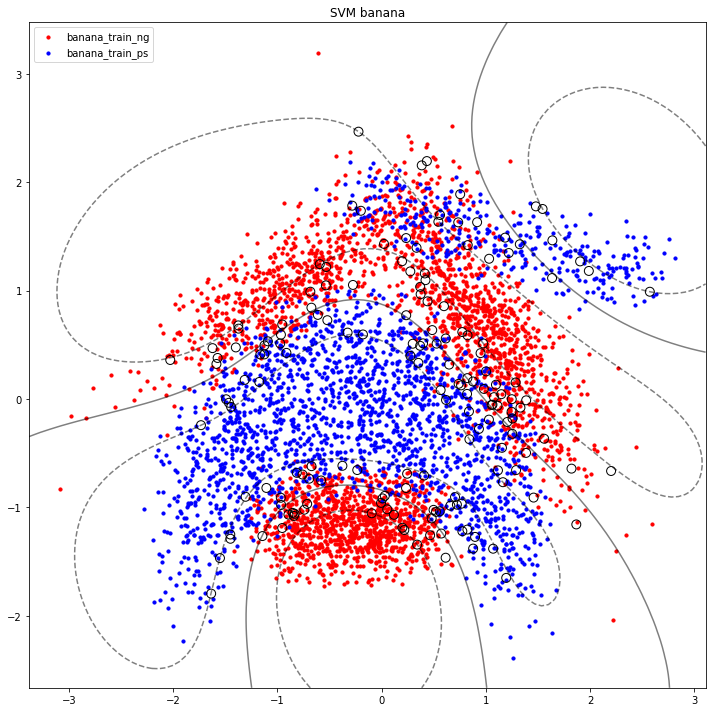

In [67]:

import scipy.io as sio

mat = sio.loadmat('banana_1.mat') # Load _banana_ data.

x_train = mat['x_train']
y_train = mat['y_train'][:, 0]
x_test = mat['x_test']
y_test = mat['y_test'][:, 0]

svm4_0 = SVC(kernel='rbf').fit(x_train,y_train)

svm4_1 = SVC(kernel='rbf',C=0.05,gamma=0.1).fit(x_train,y_train)
svm4_2 = SVC(kernel='rbf',C=0.05,gamma=1).fit(x_train,y_train)
svm4_3 = SVC(kernel='rbf',C=0.05,gamma=10).fit(x_train,y_train)
svm4_4 = SVC(kernel='rbf',C=1,gamma=0.1).fit(x_train,y_train)
svm4_5 = SVC(kernel='rbf',C=1,gamma=1).fit(x_train,y_train)
svm4_6 = SVC(kernel='rbf',C=1,gamma=10).fit(x_train,y_train)
svm4_7 = SVC(kernel='rbf',C=1000,gamma=0.1).fit(x_train,y_train)
svm4_8 = SVC(kernel='rbf',C=1000,gamma=1).fit(x_train,y_train)
svm4_9 = SVC(kernel='rbf',C=1000,gamma=10).fit(x_train,y_train)

plt.figure(figsize=(10,10))

plt.scatter(x_test[y_test<0, 0], x_test[y_test<0, 1], label='banana_train_ng', c='r',s=10)
plt.scatter(x_test[y_test>0, 0], x_test[y_test>0, 1], label='banana_train_ps', c='b',s=10)

xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                        np.linspace(ylim[0], ylim[1], 100))

Z = svm4_0.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(svm4_0.support_vectors_[:, 0], svm4_0.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')

plt.title("SVM banana" )
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

(gamma) low value => far, high value => close
(C) is margin, low val=>larger margin, high val => smaller margin
test accuracy for SVM 1 (C=0.05,gamma=0.1) :  0.44510204081632654
---
train accuracy for SVM 1 (C=0.05,gamma=0.1) :  0.55
-----------------------------------------------------------------
test accuracy for SVM 2 (C=0.05,gamma=1) :  0.8420408163265306
---
train accuracy for SVM 2 (C=0.05,gamma=1) :  0.8775
-----------------------------------------------------------------
test accuracy for SVM 3 (C=0.05,gamma=10) :  0.5426530612244898
---
train accuracy for SVM 3 (C=0.05,gamma=10) :  0.645
-----------------------------------------------------------------
test accuracy for SVM 4 (C=1,gamma=0.1) :  0.5871428571428572
---
train accuracy for SVM 4 (C=1,gamma=0.1) :  0.6525
-----------------------------------------------------------------
test accuracy for SVM 5 (C=1,gamma=1) :  0.8908163265306123
---
train accuracy for SVM 5 (C=1,gamma=1) :  0.9225
---------------------------------

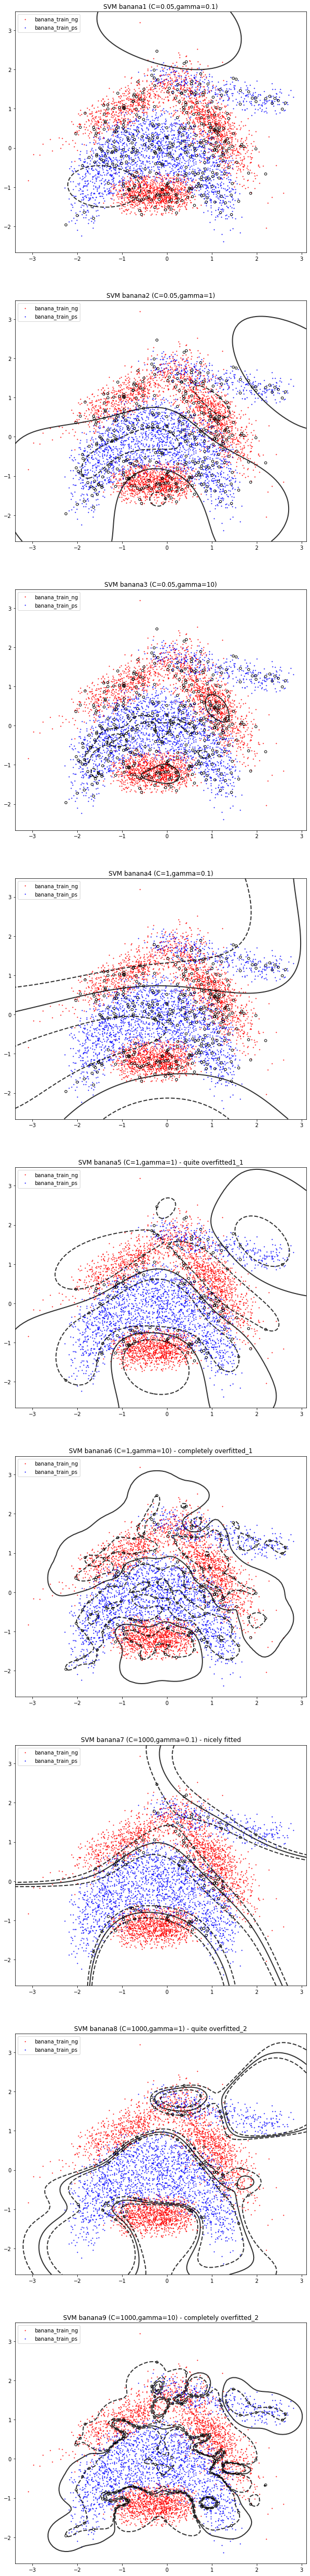

In [78]:
fig = plt.figure(figsize=(10,90))

ax1  = fig.add_subplot(911)
ax2  = fig.add_subplot(912)
ax3  = fig.add_subplot(913)
ax4  = fig.add_subplot(914)
ax5  = fig.add_subplot(915)
ax6  = fig.add_subplot(916)
ax7  = fig.add_subplot(917)
ax8  = fig.add_subplot(918)
ax9  = fig.add_subplot(919)

Z1 = svm4_1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

Z2 = svm4_2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

Z3 = svm4_3.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

Z4 = svm4_4.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z4 = Z4.reshape(xx.shape)

Z5 = svm4_5.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z5 = Z5.reshape(xx.shape)

Z6 = svm4_6.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z6 = Z6.reshape(xx.shape)

Z7 = svm4_7.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z7 = Z7.reshape(xx.shape)

Z8 = svm4_8.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z8 = Z8.reshape(xx.shape)

Z9 = svm4_9.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z9 = Z9.reshape(xx.shape)


axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
svms = [svm4_1,svm4_2,svm4_3,svm4_4,svm4_5,svm4_6,svm4_7,svm4_8,svm4_9]
zs = [Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9]
svmparams = ['(C=0.05,gamma=0.1)','(C=0.05,gamma=1)','(C=0.05,gamma=10)','(C=1,gamma=0.1)','(C=1,gamma=1)','(C=1,gamma=10)','(C=1000,gamma=0.1)','(C=1000,gamma=1)','(C=1000,gamma=10)']

for xi in axs:
    xi.scatter(x_test[y_test<0, 0], x_test[y_test<0, 1], label='banana_train_ng', c='r',s=1)
    xi.scatter(x_test[y_test>0, 0], x_test[y_test>0, 1], label='banana_train_ps', c='b',s=1)

xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                        np.linspace(ylim[0], ylim[1], 100))

# for zi,svmi in zip(zs,svms):
#     zi = svmi.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     zi = zi.reshape(xx.shape)

for axi,zi in zip(axs,zs):
    axi.contour(xx, yy, zi, colors='k', levels=[-1, 0, 1], alpha=0.8,
    linestyles=['--', '-', '--'],linewidths=2,zorder=20)

# plt.scatter(support_vectors1[:, 0], support_vectors1[:, 1], s=200,
#             linewidth=1, facecolors='none', edgecolors='k')

for axi,svmi in zip(axs,svms):
    # print(axi,svmi)
    axi.scatter(svmi.support_vectors_[:, 0], svmi.support_vectors_[:, 1], s=20,
            facecolors='none', zorder=10, edgecolors='k')
    

i = 0
print("==================================================================")
print("(C) is margin, low val=>larger margin, high val => smaller margin")
print("(gamma) low value => far, high value => close")
print("==================================================================")

for svmi,svmpi in zip(svms,svmparams):
  i = i+1
  print("test accuracy for SVM",i,svmpi,": ",svmi.score(x_test,y_test))
  print("---")
  print("train accuracy for SVM",i,svmpi,": ",svmi.score(x_train,y_train))
  print("-----------------------------------------------------------------")
# (C) is margin, low val=>larger margin, high val => smaller margin
# (gamma) low value => far, high value => close




# fig.suptitle('BANANAS', fontsize=16)
ax1.set_title("SVM banana1 (C=0.05,gamma=0.1) - [[ very large, very far  ]] " )
ax2.set_title("SVM banana2 (C=0.05,gamma=1) - [[ very large, quite far  ]] " )
ax3.set_title("SVM banana3 (C=0.05,gamma=10) - [[ very large, quite close  ]] " )
ax4.set_title("SVM banana4 (C=1,gamma=0.1) - [[ quite large, very far  ]]" )
ax5.set_title("SVM banana5 (C=1,gamma=1) - [[ quite large, quite far  ]] => @ quite overfitted1_1 @" )
ax6.set_title("SVM banana6 (C=1,gamma=10) - [[ quite large, quite close  ]] => @ completely overfitted_1 @" )
ax7.set_title("SVM banana7 (C=1000,gamma=0.1) - [[ very small, very far  ]] => @ nicely fitted @" )
ax8.set_title("SVM banana8 (C=1000,gamma=1) - [[ very small, quite far  ]] => @ quite overfitted_2 @" )
ax9.set_title("SVM banana9 (C=1000,gamma=10) - [[ very small, quite close  ]] => @ completely overfitted_2 @" )

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
ax5.legend(loc='upper left')
ax6.legend(loc='upper left')
ax7.legend(loc='upper left')
ax8.legend(loc='upper left')
ax9.legend(loc='upper left')

plt.show()


### According to ***scikit learn***'s RBF SVM parameters explanation,

Intuitively, the **gamma** parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The **gamma** parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The **C** parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of **C**, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower **C** will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words``C`` behaves as a regularization parameter in the SVM.


> so,(gamma) low value => far, high value => close <br>
> (C) is margin, low val=>larger margin, high val => smaller margin
